# Universidad de Buenos Aires
# Deep Learning - Examen

Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing

El dataset son compras de productos que diferentes clientes realizaron durante el black sales.

El dataset contiene información sobre las transacciones y el objetivo es poder utilizar el dataset para crear diferentes modelos que puedan predecir cuanto un cliente está dispuesto a gastar en un producto en el futuro. Particularmente, vamos a tratar este problema como una clasificación binaria donde queremos averiguar si el cliente va a gatar mucha plata (más de 9000) o poca plata (menos de 9000).

Vamos a construir 4 modelos:

* Un modeo que siempre predice que los clientes gastan mucha plata en todos los productos.
* Un modelo del tipo de Regresión Logīstica. 
* Un modelo del tipo Random Forest.
* Un modelo del tipo Deep Learning sin embeddings.
* Un modelo del tipo Deep Learning con embeddings.

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Colab Notebooks/")
!ls

Mounted at /content/drive
'03 - Introducción a la clasificación con Keras'
'04 - Detección de anomalías con Keras'
'05 - Embeddings con Keras'
'06 - Autoencoders con Keras'
'07 - Integrador.ipynb'
'CV2 - 01 - Capas_convolucionales.ipynb'
'CV2 - 02 red_cnn_simple.ipynb'
'CV2 - 03 Modelo_convolucional_aplicacion_keras.ipynb'
 data
'Deep Learning - Clase 8 Examen.ipynb'
 desorden
'Machine Learning 1 - 8.1 Boosting.ipynb'
'Machine Learning 1 - 8.2 Bagging.ipynb'
 model_plot.png
 model.png
 models


In [138]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

dataset = pd.read_csv('data/black_sales.csv')

# Análisis de datos

1. Imprimir las 5 primeros filas del dataset. 
2. Imprimir los tipos de cada columna del dataset.
3. Imprimir las estadísticas básicas de cada columnas. 
4. Hacer un histograma de la variable Purchase.
5. Que columnas son categóricas y cuales son numéricas?
6. Para las columnas categóricas, cuántas clases únicas tienen cada una?

In [139]:
# 1. Imprimir las 5 primeros filas del dataset. 
dataset.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [124]:
# 2. Imprimir los tipos de cada columna del dataset.
dataset.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [134]:
# 3. Imprimir las estadísticas básicas de cada columnas. 
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87b4355978>]],
      dtype=object)

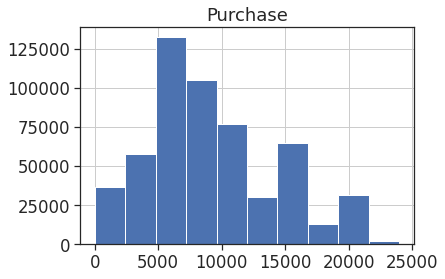

In [135]:
# 4. Hacer un histograma de la variable Purchase.
dataset.hist('Purchase')

# 5. Que columnas son categóricas y cuales son numéricas?

~~~
User_ID                         int64 Categórica
Product_ID                     object Categórica
Gender                         object Categórica
Age                            object Categórica (por rangos de edad)
Occupation                      int64 Categórica
City_Category                  object Categórica
Stay_In_Current_City_Years     object Categórica (por cantidades fijas o rangos)
Marital_Status                  int64 Categórica
Product_Category_1              int64 Categórica
Product_Category_2            float64 Categórica
Product_Category_3            float64 Categórica
Purchase                        int64 Numérica   (Monto)
~~~

In [143]:
# 6. Para las columnas categóricas, cuántas clases únicas tienen cada una?
categorical_fields = [
  "User_ID",
  "Product_ID",
  "Gender",
  "Age",
  "Occupation",
  "City_Category",
  "Stay_In_Current_City_Years",
  "Marital_Status",
  "Product_Category_1",
  "Product_Category_2",
  "Product_Category_3"
]

def list_categorical_fields(df,categorical_fields):  
  df_tmp = df.copy()
  for f in categorical_fields:    
    df_tmp.loc[:,f].fillna(999, inplace=True) # Si no saco NaNs, falla cálculo de Product Category 2 y 3?
    print("Categoría: {}. Tipo: {} Valores únicos: {}".format(f, df_tmp[f].dtype, (np.unique(np.array(df_tmp[f])).shape)))
list_categorical_fields(dataset,categorical_fields) 

Categoría: User_ID. Tipo: int64 Valores únicos: (5891,)
Categoría: Product_ID. Tipo: object Valores únicos: (3631,)
Categoría: Gender. Tipo: object Valores únicos: (2,)
Categoría: Age. Tipo: object Valores únicos: (7,)
Categoría: Occupation. Tipo: int64 Valores únicos: (21,)
Categoría: City_Category. Tipo: object Valores únicos: (3,)
Categoría: Stay_In_Current_City_Years. Tipo: object Valores únicos: (5,)
Categoría: Marital_Status. Tipo: int64 Valores únicos: (2,)
Categoría: Product_Category_1. Tipo: int64 Valores únicos: (20,)
Categoría: Product_Category_2. Tipo: float64 Valores únicos: (18,)
Categoría: Product_Category_3. Tipo: float64 Valores únicos: (16,)


# Limpieza de datos

1. Que columnas tienen NaNs?
2. Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 


In [144]:
 #1. Que columnas tienen NaNs?
dataset.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

Sólo Product_Category_2 y Product_Category_3.

In [145]:
#2. Si la cantidad de filas afectas por NaNs es grande, se propone reemplazar los NaNs por una nueva clase, por ejemplo el valor 999. 
ds_with_nans = dataset.loc[dataset.isna().sum(axis=1)>=1,:]
ds_without_nans = dataset.loc[dataset.isna().sum(axis=1)==0,:]
print("Filas con NaNs:",ds_with_nans.shape[0])
print("Filas sin NaNs:",ds_without_nans.shape[0])

Filas con NaNs: 383247
Filas sin NaNs: 166821


In [146]:
dataset2 = dataset
for f in categorical_fields:
    dataset2.loc[:,f].fillna(999, inplace=True)

ds_with_nans = dataset2.loc[dataset2.isna().sum(axis=1)>=1,:]
ds_without_nans = dataset2.loc[dataset2.isna().sum(axis=1)==0,:]
print("Filas con NaNs:",ds_with_nans.shape)
print("Filas sin NaNs:",ds_without_nans.shape)    

Filas con NaNs: (0, 12)
Filas sin NaNs: (550068, 12)


# Ingeniería de features

1. Transformar todas las variables categoricas (expecto User_Id y Product_id) en one-hot-encoding. 
2. Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.
3. Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?
4. Porque es importante guardar el mapping de id a index?
5. Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.
6. Normalizar todos los valores entre 0 y 1.
7. Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 

In [10]:
# 1. Transformar todas las variables categoricas (expecto User_Id y Product_id) en one-hot-encoding. 
dataset2['Product_Category_2'] = dataset2['Product_Category_2'].astype(int)
dataset2['Product_Category_3'] = dataset2['Product_Category_3'].astype(int)
dataset_encoded = dataset2

Gender_dummies = pd.get_dummies(dataset_encoded.Gender,prefix='Gender')
dataset_encoded = pd.concat([dataset_encoded,Gender_dummies], axis=1)

Age_dummies = pd.get_dummies(dataset_encoded.Age,prefix='Age')
dataset_encoded = pd.concat([dataset_encoded,Age_dummies], axis=1)

Occupation_dummies = pd.get_dummies(dataset_encoded.Occupation,prefix='Occupation')
dataset_encoded = pd.concat([dataset_encoded,Occupation_dummies], axis=1)

City_Category_dummies = pd.get_dummies(dataset_encoded.City_Category,prefix='City_Category')
dataset_encoded = pd.concat([dataset_encoded,City_Category_dummies], axis=1)

Stay_In_Current_City_Years_dummies = pd.get_dummies(dataset_encoded.Stay_In_Current_City_Years,prefix='Stay_In_Current_City_Years')
dataset_encoded = pd.concat([dataset_encoded,Stay_In_Current_City_Years_dummies], axis=1)

Marital_Status_dummies = pd.get_dummies(dataset_encoded.Marital_Status,prefix='Marital_Status')
dataset_encoded = pd.concat([dataset_encoded,Marital_Status_dummies], axis=1)

Product_Category_1_dummies = pd.get_dummies(dataset_encoded.Product_Category_1,prefix='Product_Category_1')
dataset_encoded = pd.concat([dataset_encoded,Product_Category_1_dummies], axis=1)

Product_Category_2_dummies = pd.get_dummies(dataset_encoded.Product_Category_2,prefix='Product_Category_2')
dataset_encoded = pd.concat([dataset_encoded,Product_Category_2_dummies], axis=1)

Product_Category_3_dummies = pd.get_dummies(dataset_encoded.Product_Category_3,prefix='Product_Category_3')
dataset_encoded = pd.concat([dataset_encoded,Product_Category_3_dummies], axis=1)

print(dataset_encoded.info())
dataset_encoded

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Columns: 106 entries, User_ID to Product_Category_3_999
dtypes: int64(7), object(5), uint8(94)
memory usage: 99.7+ MB
None


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,...,Product_Category_1_15,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2,Product_Category_2_3,Product_Category_2_4,Product_Category_2_5,Product_Category_2_6,Product_Category_2_7,Product_Category_2_8,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18,Product_Category_2_999,Product_Category_3_3,Product_Category_3_4,Product_Category_3_5,Product_Category_3_6,Product_Category_3_8,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Product_Category_3_999
0,1000001,P00069042,F,0-17,10,A,2,0,3,999,999,8370,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1000001,P00087842,F,0-17,10,A,2,0,12,999,999,1422,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,999,1057,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1000002,P00285442,M,55+,16,C,4+,0,8,999,999,7969,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,999,999,368,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550064,1006035,P00375436,F,26-35,1,C,3,0,20,999,999,371,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,999,999,137,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
550066,1006038,P00375436,F,55+,1,C,2,0,20,999,999,365,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [11]:
# 2. Crear un index para User_Id y Product_id, para poder entrenar un modelo de Deep Learning con embeddings.

final_dataset = dataset_encoded

User_Id = final_dataset['User_ID'].to_numpy()
Product_id = final_dataset['Product_ID'].to_numpy()

_, user_idx = np.unique(User_Id, return_inverse=True)
_, product_idx = np.unique(Product_id, return_inverse=True)

user_id2idx = { id:idx for id,idx in zip(User_Id,user_idx)}
product_id2idx = { id:idx for id,idx in zip(Product_id,product_idx)}

#### 3. Porque es importante crear un index para entrenar el modelo de Deep Learning con embeddings?

Los identificadores de las variables categóricas de Usuario y Producto representan referencias (códigos, punteros o número de registros) del origen de datos. 
Es de interés para crear un embedding asignar a cada instancia única de un Usuario o Producto una representación en un espacio vectorial. Aún si no se utilizaran embeddings, el valor númerico del idenficador original es irrelevante, sólo importa que haga referncia a un elemento único. 

#### 4. Porque es importante guardar el mapping de id a index?

Se debe preservar la tabla de conversión de Id a índice porque cuando se utilice el modelo en producción los Ids que ingresen a la API utilizarán la codificación del origen de datos original.

In [12]:
# 5. Transformar la variable Purchase en una variable purchase_binary, tal que todos los valores mayores a 9000 hagan un mapping a 1 y todos los valores menores o iguales a 9000 hagan un mapping a 0.
final_dataset['binary_purchase'] = final_dataset.Purchase.apply(lambda label: 0 if label <9000 else 1 )
print("Compras menores a $9000:", final_dataset[final_dataset['binary_purchase']==0].shape)
print("Compras superiores a $9000:", final_dataset[final_dataset['binary_purchase']==1].shape)

Compras menores a $9000: (330871, 107)
Compras superiores a $9000: (219197, 107)


In [13]:
final_dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,Occupation_0,Occupation_1,Occupation_2,Occupation_3,Occupation_4,Occupation_5,Occupation_6,Occupation_7,Occupation_8,Occupation_9,Occupation_10,Occupation_11,Occupation_12,Occupation_13,Occupation_14,Occupation_15,Occupation_16,Occupation_17,Occupation_18,...,Product_Category_1_16,Product_Category_1_17,Product_Category_1_18,Product_Category_1_19,Product_Category_1_20,Product_Category_2_2,Product_Category_2_3,Product_Category_2_4,Product_Category_2_5,Product_Category_2_6,Product_Category_2_7,Product_Category_2_8,Product_Category_2_9,Product_Category_2_10,Product_Category_2_11,Product_Category_2_12,Product_Category_2_13,Product_Category_2_14,Product_Category_2_15,Product_Category_2_16,Product_Category_2_17,Product_Category_2_18,Product_Category_2_999,Product_Category_3_3,Product_Category_3_4,Product_Category_3_5,Product_Category_3_6,Product_Category_3_8,Product_Category_3_9,Product_Category_3_10,Product_Category_3_11,Product_Category_3_12,Product_Category_3_13,Product_Category_3_14,Product_Category_3_15,Product_Category_3_16,Product_Category_3_17,Product_Category_3_18,Product_Category_3_999,binary_purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,999,999,8370,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,1000001,P00087842,F,0-17,10,A,2,0,12,999,999,1422,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,999,1057,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1000002,P00285442,M,55+,16,C,4+,0,8,999,999,7969,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,999,999,368,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
550064,1006035,P00375436,F,26-35,1,C,3,0,20,999,999,371,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,999,999,137,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
550066,1006038,P00375436,F,55+,1,C,2,0,20,999,999,365,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [14]:
# 7. Hacer un split del dataset en training (70%), validation (20%) y testing (10%). Para crear el dataset de training se recomienda separar User_id y Product_id de la matriz x_train, x_valid y x_test. Pero también obtener user_idx_train, user_idx_valid y user_idex_test de tal manera que sea correspondientes con las matrices x. Lo mismo para el Product_Id. 
final_dataset_2 = final_dataset.drop([
  'User_ID', 'Product_ID', 'Age','Gender','Occupation','Marital_Status',
  'City_Category','Stay_In_Current_City_Years',
  'Product_Category_1','Product_Category_2','Product_Category_3',
  'Purchase'
  ], axis=1, inplace=False)
final_dataset_2.dtypes

Gender_F                  uint8
Gender_M                  uint8
Age_0-17                  uint8
Age_18-25                 uint8
Age_26-35                 uint8
                          ...  
Product_Category_3_16     uint8
Product_Category_3_17     uint8
Product_Category_3_18     uint8
Product_Category_3_999    uint8
binary_purchase           int64
Length: 95, dtype: object

In [15]:
n_samples = final_dataset_2.shape[0]
indexes = np.random.permutation(np.arange(0, n_samples))
train_idx = indexes[0:int(0.7*n_samples)]
validation_idx = indexes[int(0.7*n_samples): int(0.9*n_samples)]
test_idx = indexes[int(0.9*n_samples):]
assert n_samples == train_idx.size + validation_idx.size + test_idx.size

In [16]:
y = final_dataset_2.binary_purchase

final_dataset_without_y = final_dataset_2.drop(['binary_purchase'], axis=1, inplace=False)

x_train = final_dataset_without_y.iloc[train_idx,:]
user_idx_train = user_idx[train_idx]
product_idx_train = product_idx[train_idx]
y_train = y.iloc[train_idx].to_numpy()

x_validation = final_dataset_without_y.iloc[validation_idx,:]
user_idx_validation = user_idx[validation_idx]
product_idx_validation = product_idx[validation_idx]
y_validation = y.iloc[validation_idx].to_numpy()

x_test = final_dataset_without_y.iloc[test_idx, :]
user_idx_test = user_idx[test_idx]
product_idx_test = product_idx[test_idx]
y_test = y.iloc[test_idx].to_numpy()

Normalización de datos. Nota: es más correrlo hacerlo antes de splitear para evitar el vstack() en el orden indicado por el ejercicio, pero no encontré una forma rápida de mantener los nombres de columnas si se normalizaba el dataframe extrayendo values() de numpy y creando un nuevo dataframe con esos values.

In [33]:
# 6. Normalizar todos los valores entre 0 y 1.
min_max_scaler = preprocessing.MinMaxScaler()

sz1,sz2,sz3 = x_train.shape[0], x_validation.shape[0], x_test.shape[0]
x_stacked = np.vstack((x_train,x_validation,x_test))
x_stacked_norm = min_max_scaler.fit_transform(x_stacked)

x_train_norm = x_stacked_norm[0:sz1]
x_validation_norm = x_stacked_norm[sz1:(sz1+sz2)]
x_test_norm = x_stacked_norm[(sz1+sz2):]

assert x_train_norm.shape[0] == sz1
assert x_validation_norm.shape[0] == sz2
assert x_test_norm.shape[0] == sz3

print(x_train_norm.min(),x_train_norm.max())
print(x_validation_norm.min(),x_validation_norm.max())
print(x_test_norm.min(),x_test_norm.max())
print("X_train.shape:",x_train_norm.shape)
print("x_validation_norm.shape:",x_validation_norm.shape)
print("x_test_norm.shape:",x_test_norm.shape)
print("y_train.shape:",y_train.shape)
print("y_validation_norm.shape:",y_validation.shape)
print("y_test_norm.shape:",y_test.shape)

0.0 1.0
0.0 1.0
0.0 1.0
X_train.shape: (385047, 94)
x_validation_norm.shape: (110014, 94)
x_test_norm.shape: (55007, 94)
y_train.shape: (385047,)
y_validation_norm.shape: (110014,)
y_test_norm.shape: (55007,)


#Modelo base

1. Entrenar un modelo base que siempre de como predicción que el purchase del cliente es de valor elevado.
2. Calcular el AUC de este modelo.
3. Porque es importante siempre definir un modelo base?

In [147]:
# 1. Entrenar un modelo base que siempre de como predicción que el purchase del cliente es de valor elevado.
class BaseModel(object):
  def fit(self,X,y):
    return None
  def predict(self,X):
    prediction = np.ones(shape=X.shape[0])
    return prediction

base_model = BaseModel()
base_model.fit(x_train_norm,y_train)
bm_predictions = base_model.predict(x_validation_norm)

# 2. Calcular el AUC de este modelo.
fpr,tpr,thresholds = metrics.roc_curve(y_validation,bm_predictions)
print("AUC de modelo base: ", metrics.auc(fpr,tpr))

AUC de modelo base:  0.5


#### 3. Porque es importante siempre definir un modelo base?

Definimos un modelo base para siempre comparar los sucesivos modelos respecto a una predicción aleatoria o arbitraria, que representa el no tomar ninguna decisión sobre los datos. Se espera que los sucesivos modelos, como mínimo, mejoren las métricas del modelo base.


# Regresión logísica

1. Entrenar un modelo de regresión logística que sea mejor que el modelo base (no usar User_Id y Product_Id). 
2. Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?
3. Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

In [153]:
# 1. Entrenar un modelo de regresión logística que sea mejor que el modelo base (no usar User_Id y Product_Id). 
assert 'User_ID' not in x_train_norm
assert 'Product_ID' not in x_train_norm

lr_model = LogisticRegression(C=1.0, solver="sag", max_iter=1000)
lr_model.fit(x_train_norm,y_train)

lr_predictions = lr_model.predict(x_validation_norm)
fpr,tpr,thresholds = metrics.roc_curve(y_validation,lr_predictions)
print("AUC de R.L Validation: {}".format(metrics.auc(fpr,tpr)))

lr_predictions = lr_model.predict(x_test_norm)
fpr,tpr,thresholds = metrics.roc_curve(y_test,lr_predictions)
print("AUC de R.L Test: {}".format(metrics.auc(fpr,tpr)))

AUC de R.L Validation: 0.8649307191623956
AUC de R.L Test: 0.8649312266009584


#### 2. Porque es importante normalizar los datos antes de entrenar el modelo de regresión logística?

En regresión logística se deben normalizar los datos para escalar todos los features de entrada y así facilitar la convergencia. El principal motivo es que el learning rate usado en el algoritmo de gradiente descendente es el mismo para todas las columnas de features, y por lo tanto  el gradiente puede terminar requiriendo valores extremos para ajustar algunos pesos.

#### 3. Porque es importante utilizar una metrica como AUC en un problema de clasificación binaria?

El objetivo de usar la métrica AUC (Área bajo la Curva) en este y otros clasificadores, es evaluar el modelo de manera independiente del umbral de discriminación (threshold) entre una clase y otra.

# Random forest

1. Entrenar un modelo de Random Forest que sea mejor que el modelo base (no usar User_Id y Product_Id).

In [54]:
assert 'User_ID' not in x_train
assert 'Product_ID' not in x_train

In [41]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=3,random_state=0)
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [42]:
rf_predictions = rf_model.predict(x_validation_norm)
fpr,tpr,thresholds = metrics.roc_curve(y_validation,rf_predictions)
print("AUC de R.F Validation: {}".format(metrics.auc(fpr,tpr)))

rf_predictions = rf_model.predict(x_test_norm)
fpr,tpr,thresholds = metrics.roc_curve(y_test,rf_predictions)
print("AUC de R.F Test: {}".format(metrics.auc(fpr,tpr)))

AUC de R.F Validation: 0.7886731466189186
AUC de R.F Test: 0.790750697629523


# Deep learning sin embeddings

1. Entrenar un modelo de Deep Learning que no utilice embeddings (no usar User_Id y Product_Id).

In [155]:
dl_model_metrics = [
    tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]

def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100,activation='relu'))
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
  return model

model1 = create_model()

model1.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=dl_model_metrics
)

history1 = model1.fit(
    x_train_norm.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(x_validation_norm.astype(np.float32), y_validation.astype(np.float32)),
)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

def plot_all(history,loss_metric,perf_metric):
  fig1 = go.Figure()
  fig1.add_trace(go.Scattergl(y=history.history[perf_metric], name='Train'))
  fig1.add_trace(go.Scattergl(y=history.history['val_'+perf_metric], name='Valid'))
  fig1.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='AUC')

  fig2 = go.Figure()
  fig2.add_trace(go.Scattergl(y=history.history[loss_metric], name='Train'))
  fig2.add_trace(go.Scattergl(y=history.history['val_'+loss_metric], name='Valid'))
  fig2.update_layout(height=300, width=400,xaxis_title='Epoch', yaxis_title='Loss')

  return [fig1,fig2]

fig1,fig2=plot_all(history1,loss_metric='loss',perf_metric="auc")
fig1.show()
fig2.show()

Epoch 1/10
6017/6017 [==============================] - 27s 4ms/step - loss: 0.3191 - auc: 0.9257 - precision: 0.8117 - recall: 0.8521 - val_loss: 0.3076 - val_auc: 0.9311 - val_precision: 0.8207 - val_recall: 0.8515
Epoch 2/10
6017/6017 [==============================] - 26s 4ms/step - loss: 0.3086 - auc: 0.9311 - precision: 0.8140 - recall: 0.8572 - val_loss: 0.3053 - val_auc: 0.9328 - val_precision: 0.8198 - val_recall: 0.8549
Epoch 3/10
6017/6017 [==============================] - 26s 4ms/step - loss: 0.3060 - auc: 0.9328 - precision: 0.8159 - recall: 0.8553 - val_loss: 0.3048 - val_auc: 0.9337 - val_precision: 0.8134 - val_recall: 0.8635
Epoch 4/10
6017/6017 [==============================] - 26s 4ms/step - loss: 0.3044 - auc: 0.9338 - precision: 0.8165 - recall: 0.8556 - val_loss: 0.3030 - val_auc: 0.9343 - val_precision: 0.8191 - val_recall: 0.8559
Epoch 5/10
6017/6017 [==============================] - 26s 4ms/step - loss: 0.3030 - auc: 0.9347 - precision: 0.8172 - recall: 0.85

In [156]:
dl_model_results = {}
dl_model1_predictions = model1.predict(x_test_norm)
fpr,tpr,thresholds = metrics.roc_curve(y_test,dl_model1_predictions)
dl_model_results["model1"] = {
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds,
    "AUC": metrics.auc(fpr,tpr)
}
print("AUC de Modelo 1: ", dl_model_results["model1"]["AUC"])

AUC de Modelo 1:  0.9350592492250616


# Deep learning con embeddings

1. Entrenar un model de Deep Learning que utilice embeddings de los usuarios y los productos.

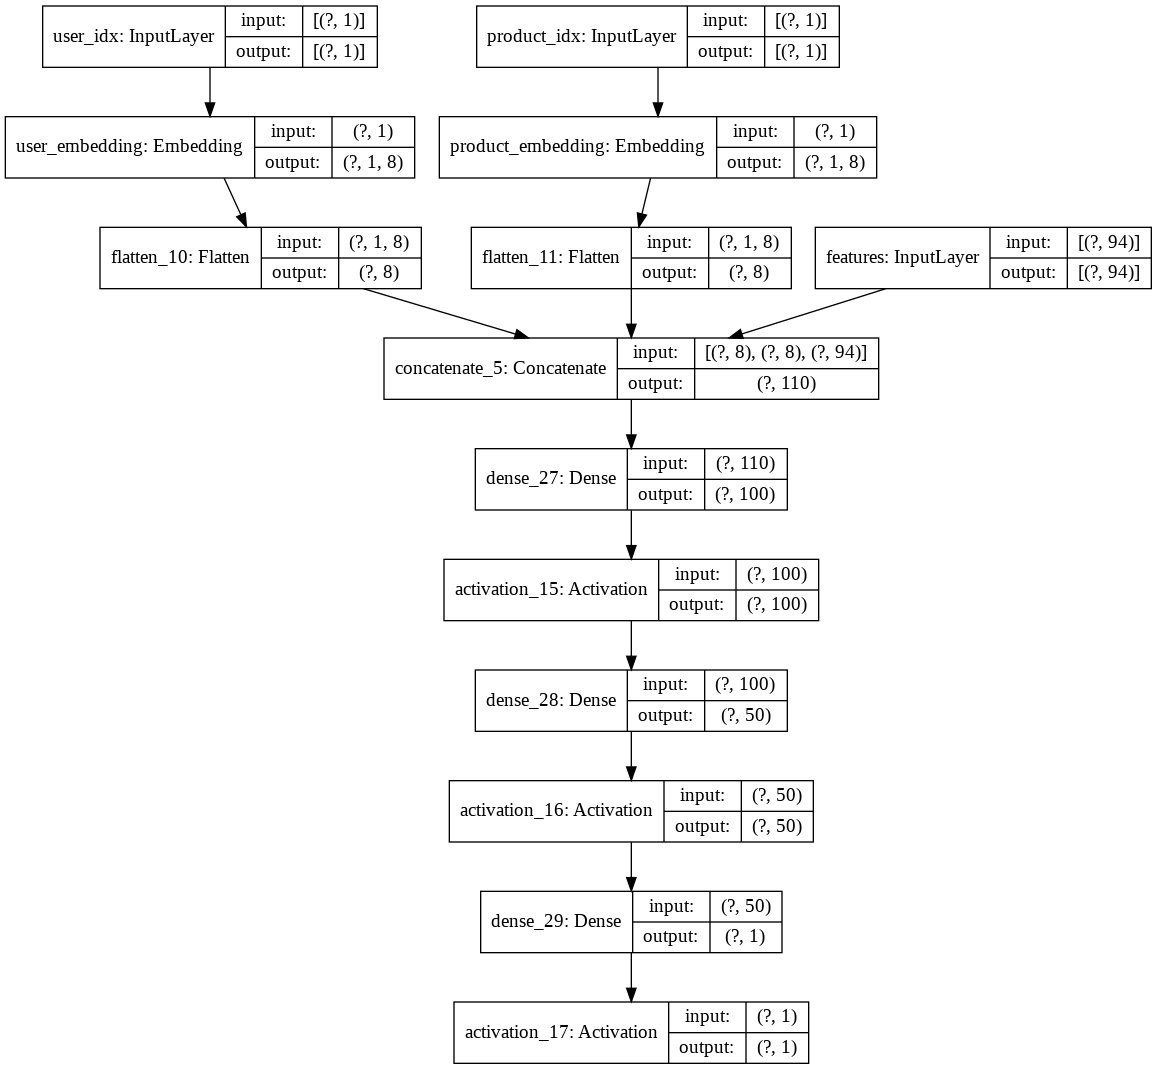

In [157]:
# FIXME https://github.com/tensorflow/tensorflow/issues/39370
#import keras
dl_model_metrics = [
    keras.metrics.AUC(name='auc'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
]

def create_model_with_embeddings():
  features_input= keras.Input(shape=(94,), name='features')
  
  user_idx_input = keras.Input(shape=(1,), name='user_idx')
  product_idx_input = keras.Input(shape=(1,), name='product_idx')
  
  user_embedding = keras.layers.Embedding(user_idx.max()+1,8,input_length=1,name="user_embedding")(user_idx_input)  
  user_embedding = keras.layers.Flatten()(user_embedding)

  product_embedding = keras.layers.Embedding(product_idx.max()+1,8,input_length=1,name="product_embedding")(product_idx_input)  
  product_embedding = keras.layers.Flatten()(product_embedding)

  concatenated = tf.keras.layers.Concatenate()([
          user_embedding,
          product_embedding,
          features_input
  ])

  out = keras.layers.Dense(100)(concatenated)
  out = keras.layers.Activation('relu')(out)
  out = keras.layers.Dense(50)(out)
  out = keras.layers.Activation('relu')(out)
  out = keras.layers.Dense(1)(out)
  out = keras.layers.Activation('sigmoid')(out)

  model = tf.keras.Model(
      inputs = [user_idx_input,product_idx_input,features_input],
      outputs = out,
  )
  return model

model2 = create_model_with_embeddings()

model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='binary_crossentropy',
    metrics=dl_model_metrics
)

plot_model(model2,to_file="model_plot.png",show_shapes=True,show_layer_names=True)

In [158]:
history2 = model2.fit(
    [ user_idx_train.astype(np.float32),product_idx_train.astype(np.float32),x_train_norm.astype(np.float32) ],
    y_train.astype(np.float32),
    epochs=20,
    batch_size=16,
    validation_data=(
      [
        user_idx_validation.astype(np.float32),
        product_idx_validation.astype(np.float32),
        x_validation_norm.astype(np.float32)
      ], 
      y_validation.astype(np.float32) 
    )
)

fig1,fig2=plot_all(history2,loss_metric='loss',perf_metric="auc")
fig1.show()
fig2.show()

Epoch 1/20
24066/24066 [==============================] - 137s 6ms/step - loss: 0.2781 - auc: 0.9480 - precision: 0.8291 - recall: 0.8664 - val_loss: 0.2722 - val_auc: 0.9541 - val_precision: 0.8359 - val_recall: 0.8729
Epoch 2/20
24066/24066 [==============================] - 137s 6ms/step - loss: 0.2587 - auc: 0.9557 - precision: 0.8349 - recall: 0.8859 - val_loss: 0.2655 - val_auc: 0.9542 - val_precision: 0.8436 - val_recall: 0.8658
Epoch 3/20
24066/24066 [==============================] - 130s 5ms/step - loss: 0.2546 - auc: 0.9574 - precision: 0.8357 - recall: 0.8918 - val_loss: 0.2759 - val_auc: 0.9548 - val_precision: 0.8284 - val_recall: 0.8853
Epoch 4/20
24066/24066 [==============================] - 131s 5ms/step - loss: 0.2507 - auc: 0.9587 - precision: 0.8369 - recall: 0.8956 - val_loss: 0.2638 - val_auc: 0.9553 - val_precision: 0.8324 - val_recall: 0.8838
Epoch 5/20
24066/24066 [==============================] - 129s 5ms/step - loss: 0.2493 - auc: 0.9593 - precision: 0.8356

In [161]:
dl_model2_predictions = model2.predict([ user_idx_test.astype(np.float32),product_idx_test.astype(np.float32),x_test_norm.astype(np.float32) ])
fpr,tpr,thresholds = metrics.roc_curve(y_test,dl_model2_predictions)
print("AUC de Modelo 2: ", metrics.auc(fpr,tpr))

AUC de Modelo 2:  0.9546463666884565


Conclusiones del primer entrenamiento del segundo modelo:
- La métrica obtenida es satisfactoria (AUC=0.954). No obstante, aparentemente para los parámetros ensayados está teniendo overfitting porque a partir de una época mejora en el entrenamiento y empeora en la validación. Se reintentará con otros hiperparámetros.


In [57]:
def train_second_model_with_embeddings(lr=0.01,n_epochs=10,batch_size=32):
  dl_model_metrics = [
    keras.metrics.AUC(name='auc'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall')
  ]
  features_input= keras.Input(shape=(94,), name='features')
  user_idx_input = keras.Input(shape=(1,), name='user_idx')
  product_idx_input = keras.Input(shape=(1,), name='product_idx')
  user_embedding = keras.layers.Embedding(user_idx.max()+1,8,input_length=1,name="user_embedding")(user_idx_input)  
  user_embedding = keras.layers.Flatten()(user_embedding)
  product_embedding = keras.layers.Embedding(product_idx.max()+1,8,input_length=1,name="product_embedding")(product_idx_input)  
  product_embedding = keras.layers.Flatten()(product_embedding)
  concatenated = tf.keras.layers.Concatenate()([user_embedding,product_embedding,features_input])
  out = keras.layers.Dense(100)(concatenated)
  out = keras.layers.Activation('relu')(out)
  out = keras.layers.Dense(50)(out)
  out = keras.layers.Activation('relu')(out)
  out = keras.layers.Dense(1)(out)
  out = keras.layers.Activation('sigmoid')(out)
  model = tf.keras.Model(
      inputs = [user_idx_input,product_idx_input,features_input],
      outputs = out,
  )
  
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
      loss='binary_crossentropy',
      metrics=dl_model_metrics
  )
  history = model.fit(
    [ user_idx_train.astype(np.float32),product_idx_train.astype(np.float32),x_train_norm.astype(np.float32) ],
    y_train.astype(np.float32),
    epochs=n_epochs,
    batch_size=batch_size,
    validation_data=([
        user_idx_validation.astype(np.float32),
        product_idx_validation.astype(np.float32),
        x_validation_norm.astype(np.float32)
      ], 
      y_validation.astype(np.float32) 
    )
  )
  return model,history

trained_model2_results = []
trained_model2_results.append(train_second_model_with_embeddings(lr=0.01,n_epochs=10,batch_size=256))
trained_model2_results.append(train_second_model_with_embeddings(lr=0.001,n_epochs=10,batch_size=64))
trained_model2_results.append(train_second_model_with_embeddings(lr=0.05,n_epochs=10,batch_size=128))


Epoch 1/10
1505/1505 [==============================] - 9s 6ms/step - loss: 0.2730 - auc: 0.9498 - precision: 0.8344 - recall: 0.8626 - val_loss: 0.2607 - val_auc: 0.9554 - val_precision: 0.8513 - val_recall: 0.8556
Epoch 2/10
1505/1505 [==============================] - 8s 6ms/step - loss: 0.2488 - auc: 0.9587 - precision: 0.8454 - recall: 0.8788 - val_loss: 0.2564 - val_auc: 0.9566 - val_precision: 0.8430 - val_recall: 0.8718
Epoch 3/10
1505/1505 [==============================] - 8s 6ms/step - loss: 0.2383 - auc: 0.9622 - precision: 0.8511 - recall: 0.8840 - val_loss: 0.2560 - val_auc: 0.9565 - val_precision: 0.8363 - val_recall: 0.8801
Epoch 4/10
1505/1505 [==============================] - 8s 6ms/step - loss: 0.2303 - auc: 0.9648 - precision: 0.8536 - recall: 0.8901 - val_loss: 0.2603 - val_auc: 0.9560 - val_precision: 0.8426 - val_recall: 0.8690
Epoch 5/10
1505/1505 [==============================] - 8s 5ms/step - loss: 0.2235 - auc: 0.9669 - precision: 0.8563 - recall: 0.8935 - 

In [62]:
# Selección de HPs 1
fig1,fig2=plot_all(trained_model2_results[0][1],loss_metric='loss',perf_metric="auc")
fig1.show()
fig2.show()

In [63]:
# Selección de HPs 2
fig1,fig2=plot_all(trained_model2_results[1][1],loss_metric='loss',perf_metric="auc")
fig1.show()
fig2.show()

In [64]:
# Selección de HPs 3
fig1,fig2=plot_all(trained_model2_results[2][1],loss_metric='loss',perf_metric="auc")
fig1.show()
fig2.show()

Observaciones: no se considera concluída la selección de los hiperparámetros, pero se eligirá el modelo entrenado con el segundo set de hiperparámetros. 

In [71]:
model2 = trained_model2_results[1][0]
dl_model2_predictions = model2.predict([ user_idx_test.astype(np.float32),product_idx_test.astype(np.float32),x_test_norm.astype(np.float32) ])
fpr,tpr,thresholds = metrics.roc_curve(y_test,dl_model2_predictions)
dl_model_results["model2"] = {
    "fpr": fpr,
    "tpr": tpr,
    "thresholds": thresholds,
    "AUC": metrics.auc(fpr,tpr)
}
print("AUC de Modelo 2: ", dl_model_results["model2"]["AUC"])

AUC de Modelo 2:  0.9560035959934579


#### Preguntas de slack: 
- Cómo podrían usar este clasificador que armaron para hacer un ranking de que productos recomendar a cada usuario ? 
- Podrían armar el ranking de productos a recomendar para cada user id?

R: Se podría utilizar la información de ambos embeddings para encontrar clusters de productos afines y usuarios afines (con poca distancia entre puntos de su espacio de representación). 
Para armar el ranking de productos a recomendar para un usuario, dado un producto adquirido o identificado como de interés para un usuario se pueden buscar productos próximos en el embedding. El ranking de productos sería de más próximos (mayor ranking) a más distantes (menor ranking).


# Comparación de los modelos

1. Comparar los resultados obtenidos.
2. Hacer el gráfico de la región de decison para cada modelo.

In [73]:
# 1. Comparar los resultados obtenidos.
print("AUC de Modelo 1 (Test set): ", dl_model_results["model1"]["AUC"])
print("AUC de Modelo 2 (Test set): ", dl_model_results["model2"]["AUC"])

AUC de Modelo 1 (Test set):  0.934564373890549
AUC de Modelo 2 (Test set):  0.9560035959934579


Ambos modelos dan buenos resultados, pero el segundo modelo con embeddings dá mejores resultados para la métrica elegida para evaluar el clasificador, que es independiente del umbral de selección. 

### Región de decisión (Intento fallido)
Nota: lo que sigue es para mostrar aproximación al ejercicio, pero no se considera que la implementación sea satisfactoria.

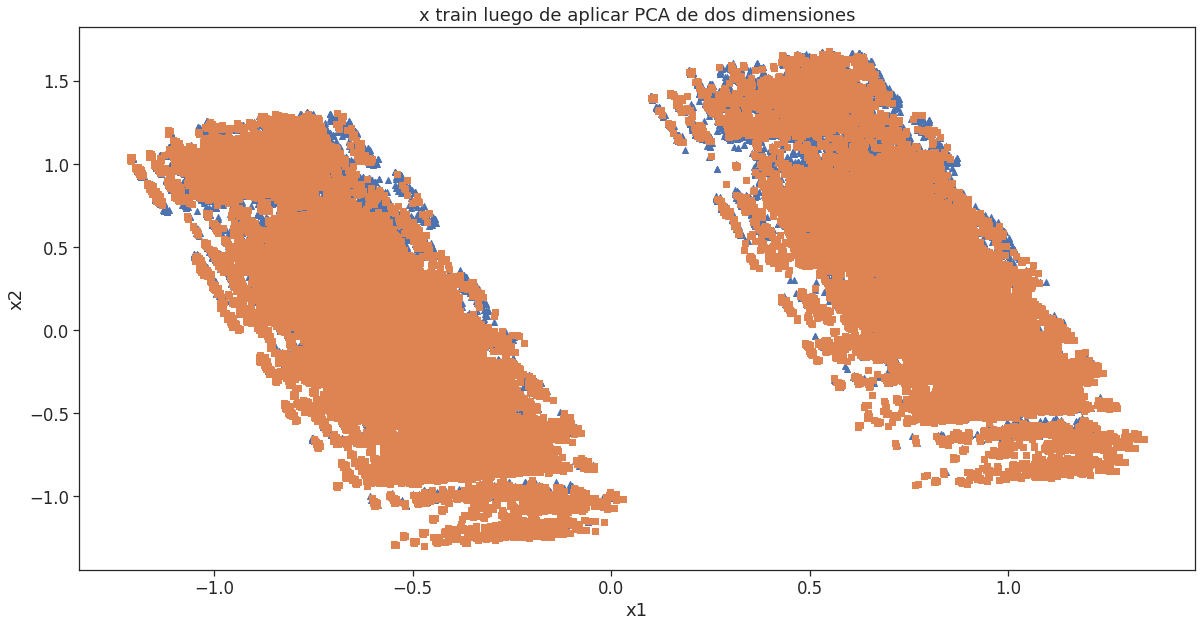

In [106]:
# 2. Hacer el gráfico de la región de decison para cada modelo.
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_norm_pca = pca.fit_transform(x_train_norm)
x_validation_norm_pca = pca.fit_transform(x_validation_norm)
x_test_norm_pca = pca.fit_transform(x_test_norm)

x_train_norm_pca_positive = x_train_norm_pca[y_train > 0.5]
x_train_norm_pca_negative = x_train_norm_pca[y_train < 0.5]

plt.figure(figsize=(20,10))
plt.scatter(x_train_norm_pca_positive[:,0], x_train_norm_pca_positive[:,1],marker="^")
plt.scatter(x_train_norm_pca_negative[:,0], x_train_norm_pca_negative[:,1],marker="s")
plt.title('x train luego de aplicar PCA de dos dimensiones')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Entrenamiento de modelo 1 como clasificador de dos inputs para el dataset comprimido con PCA.

In [87]:
dl_model_metrics = [ tf.keras.metrics.AUC(name='auc') ]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model = create_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=dl_model_metrics
)

model.fit(
    x_train_norm_pca.astype(np.float32), 
    y_train.astype(np.float32),
    epochs=10,
    batch_size=64,
    validation_data=(x_validation_norm_pca.astype(np.float32), y_validation.astype(np.float32)),
)

Epoch 1/10
6017/6017 [==============================] - 19s 3ms/step - loss: 0.5301 - auc: 0.7926 - val_loss: 0.5286 - val_auc: 0.7923
Epoch 2/10
6017/6017 [==============================] - 18s 3ms/step - loss: 0.5273 - auc: 0.7955 - val_loss: 0.5285 - val_auc: 0.7941
Epoch 3/10
6017/6017 [==============================] - 20s 3ms/step - loss: 0.5265 - auc: 0.7970 - val_loss: 0.5277 - val_auc: 0.7949
Epoch 4/10
6017/6017 [==============================] - 19s 3ms/step - loss: 0.5257 - auc: 0.7981 - val_loss: 0.5287 - val_auc: 0.7956
Epoch 5/10
6017/6017 [==============================] - 19s 3ms/step - loss: 0.5251 - auc: 0.7989 - val_loss: 0.5265 - val_auc: 0.7963
Epoch 6/10
6017/6017 [==============================] - 19s 3ms/step - loss: 0.5242 - auc: 0.8003 - val_loss: 0.5257 - val_auc: 0.7979
Epoch 7/10
6017/6017 [==============================] - 19s 3ms/step - loss: 0.5233 - auc: 0.8014 - val_loss: 0.5244 - val_auc: 0.7999
Epoch 8/10
6017/6017 [==============================] -

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



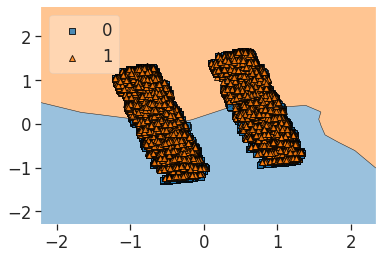

In [107]:
plot_decision_regions(x_train_norm_pca,y_train,model,legend=2)

Conclusión: el resultado de PCA no está dando variables con una separación evidente en el plano 2D para la cuál sea facil de visualizar la frontera de separación entre las dos regiones.